<a href="https://colab.research.google.com/github/minchang-KIm/-/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC1%EA%B8%89_%EB%A1%9C%EC%BB%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
!pip install bs4, selenium

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: 'bs4,'

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Step 1. 필요한 모듈을 로딩합니다
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import time  # 로딩시간을 위해 기다려준다.

웹크롤링 : 1) selenium : 원하는 페이지 접속, 2) :Beautiful Soup 1)페이지에서 원하는 데이터 추출

In [ ]:
s = Service("c:/py_temp/chromedriver.exe")
driver = webdriver.Chrome(service=s)

![image.png](attachment:image.png)

In [ ]:
driver.get("https://korean.visitkorea.or.kr/main/main.do")
driver.maximize_window()

셀리니움 구동 :
1) 요소 지정
2) 행동 할당

In [ ]:
# 요소 : <input type="text" placeholder="어디로, 어떤 여행을 떠날 예정인가요?" title="검색" id="inp_search" autocomplete="off">
keyword = "여름여행"

# 1) 요소 지정
search_bar = driver.find_element(By.ID, 'inp_search')
# 2) 행동 할당
search_bar.click()

search_bar = driver.find_element(By.ID, 'inp_search_index')
search_bar.send_keys(keyword)
search_bar.send_keys('\n')

In [ ]:
driver.find_element(By.XPATH, '//*[@id="t_attraction"]').click()

In [ ]:
from bs4 import BeautifulSoup

# 1) 페이지 소스 파싱
html_1 = driver.page_source
soup_1 = BeautifulSoup(html_1, 'html.parser')

1. 요소 찾기:
    - find()
    - find_all()
2. 내용 추출

In [ ]:
<ul class="common_list">

SyntaxError: invalid syntax (652165394.py, line 1)

In [ ]:
contents = soup_1.find('div', 'search_result')

In [ ]:
contents

<div class="search_result" id="noneBody" style="display: none;">
<p class="txt"><strong></strong> 에 대한 검색결과가 없습니다.<br/>다른 검색어를 입력하시거나 철자와 띄어쓰기를 확인해 보세요. </p>
</div>

In [ ]:
title_list = []

for content in contents:
    try:
        title = content.find('div', 'tit').get_text()
        title_list.append(title)

    except:
        pass

title_list

[]

RISS 크롤링
- keyword : "자율주행"

1. 상세페이지 크롤링 + 여러페이지 크롤링 -> 텍스트 분석
2. 이미지 크롤링

In [ ]:
#Step 1. 필요한 모듈을 로딩합니다
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import time  # 로딩시간을 위해 기다려준다.

#Step 3. 크롬 드라이버 설정 및 웹 페이지 열기
s = Service("c:/py_temp/chromedriver.exe")
driver = webdriver.Chrome(service=s)
driver.get("https://www.riss.kr/index.do")
# driver.maximize_window()
time.sleep(2)

keyword = '자율주행'
search_bar = driver.find_element(By.ID, 'query')
search_bar.click()
search_bar.send_keys(keyword)
search_bar.send_keys(Keys.ENTER)

In [ ]:
driver.find_element(By.LINK_TEXT, '국내학술논문').click()

In [ ]:
from bs4 import BeautifulSoup
html_1 = driver.page_source #현재 페이지의 전체 소스코드를 다 가져오기
soup_1 = BeautifulSoup(html_1, 'html.parser')

In [ ]:
contents = soup_1.find("div", 'srchResultListW').find_all('li')

title_list = []
url_list= []


for content in contents:

    try:
        title = content.find('p', 'title').get_text()
        title_list.append(title)
        url = content.find('p', 'title').find('a')['href']
        url = 'https://www.riss.kr/' + url
        url_list.append(url)

    except:
        pass


['머신비전과 지이로 센서를 이용한 무인자율 주행 시스템 개발 1 : 직진 주행 알고리즘 개발',
 'DGPS와 퍼지제어를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제주행 Real Operation',
 '기계시각과 퍼지논리를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제 주행 Real Operation',
 '제4차 산업혁명 시대의 자율주행자동차 상용화를 위한 안정적 법적 기반을 위한 법정책적 연구',
 '자율주행차와 통상규범',
 '자율주행자동차 표준 기술의 이해',
 '자율주행차 발전추세 소개와 국방분야 적용방안 고찰',
 '자율주행자동차 기술동향 및 핵심기술',
 '자율주행차 교통안전 교육과정 개발',
 '자율주행자동차의 상용화를 위한 행정법적 쟁점 ― 미국의 이론과 법제도를 중심으로 ―']

<a href="/search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&amp;control_no=0e159c900f51510f6aae8a972f9116fb&amp;keyword=자율주행">머신비전과 지이로 센서를 이용한 무인<span class="highlight">자율</span> <span class="highlight">주행</span> 시스템 개발 1 : 직진 주행 알고리즘 개발</a>

In [ ]:
url = contents[0].find('p', 'title').find('a')['href']

url = 'https://www.riss.kr/' + url
url

'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=0e159c900f51510f6aae8a972f9116fb&keyword=자율주행'

In [ ]:
url_list

['https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=0e159c900f51510f6aae8a972f9116fb&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=3833e73b382a40d0ffe0bdc3ef48d419&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=9978a5eeedb8c13bffe0bdc3ef48d419&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=a5ce74c287a2535ac85d2949c297615a&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=bd984a5f2c668e927f7a54760bb41745&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=b31d8eeebabbb4dcc85d2949c297615a&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=82e6059f571eb16fc85d2949c297615a&keyword=자율주행',
 'https://www.riss.kr//search/deta

In [ ]:
for url in url_list:
    driver.get(url)
    time.sleep(0.5)

아티클 : 95개
상세페이지
- 국문초록

여러 페이지 크롤링 하기

In [ ]:
page_no = 11

for i in range(2, page_no):
    driver.find_element(By.LINK_TEXT, str(i)).click()
    time.sleep(1)


In [ ]:
def title_url_collector():
    html_1 = driver.page_source #현재 페이지의 전체 소스코드를 다 가져오기
    soup_1 = BeautifulSoup(html_1, 'html.parser')
    contents = soup_1.find("div", 'srchResultListW').find_all('li')
    for content in contents:

        try:
            title = content.find('p', 'title').get_text()
            title_list.append(title)
            url = content.find('p', 'title').find('a')['href']
            url = 'https://www.riss.kr/' + url
            url_list.append(url)

        except:
            pass


In [ ]:
#Step 1. 필요한 모듈을 로딩합니다
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import time  # 로딩시간을 위해 기다려준다.

#Step 3. 크롬 드라이버 설정 및 웹 페이지 열기
s = Service("c:/py_temp/chromedriver.exe")
driver = webdriver.Chrome(service=s)
driver.get("https://www.riss.kr/index.do")
# driver.maximize_window()
time.sleep(2)

keyword = '자율주행'
search_bar = driver.find_element(By.ID, 'query')
search_bar.click()
search_bar.send_keys(keyword)
search_bar.send_keys(Keys.ENTER)
# search_bar.submit()



In [ ]:
driver.find_element(By.LINK_TEXT, '국내학술논문').click()


In [ ]:
url_list

['https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=515eab24cd02420bb7998d826d417196&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=36af8dc1eac966277ecd42904f0c5d65&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=e7ddbc1af112a7bfd18150b21a227875&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=d99c52890809ae8047de9c1710b0298d&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=e625fb0bb6b7becdb7998d826d417196&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=d6a3d908baeb837f7f7a54760bb41745&keyword=자율주행',
 'https://www.riss.kr//search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=11af4e9debf881214884a65323211ff0&keyword=자율주행',
 'https://www.riss.kr//search/deta

# 상세페이지 크롤링

In [ ]:
driver.get(url_list[3])


In [ ]:
def full_abstract():
    html_1 = driver.page_source #현재 페이지의 전체 소스코드를 다 가져오기
    soup_1 = BeautifulSoup(html_1, 'html.parser')
    try:
        abstract_kor = soup_1.find('div', 'content additionalInfo').find('div', 'text off').get_text()
        abstract_list.append(abstract_kor)
    except:
        abstract_list.append('NA')
        pass

In [ ]:
for url in url_list:
    driver.get(url)
    time.sleep(1)
    full_abstract()

In [ ]:
import pandas as pd


# len(title_list) == len(abtract_list) == len(url_list)
df = pd.DataFrame()
df['title'] = title_list
df['abstract'] = abstract_list
df['url'] = url_list

In [ ]:
df.to_csv("riss_test.csv", encoding='utf-8-sig')

In [ ]:
import os
os.getcwd()

'h:\\내 드라이브\\강의자료\\아주대_파이썬1급\\공유폴더'

![image.png](attachment:image.png)

In [ ]:
!pip install konlpy

Defaulting to user installation because normal site-packages is not writeable
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
   ---------------------------------------- 0.0/352.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/352.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/352.2 kB 660.6 kB/s eta 0:00:01
   ----------------------- ---------------- 204.8/352.2 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 352.2/352.2 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 16.9 MB/s eta 0:00:01
   ------------------ --------------------- 1.8/3.8 MB 18.8 MB/s eta 0:00:01
   ------------------------------- -------- 3.0/3.8 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------  3.8/3.8 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 20.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install matplotlib wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from konlpy.tag import *        #pip install konlpy 먼저 하세요
import matplotlib.pyplot as plt #pip install matplotlib 먼저 하세요
from matplotlib import font_manager , rc
from wordcloud import WordCloud  # pip install wordcloud 먼저 하세요
from collections import Counter
import pandas as pd

In [ ]:
# 형태소 분석기
okt = Okt()

In [ ]:
df = pd.read_csv("riss_test.csv", encoding="utf-8-sig")
data1 = df['abstract']

In [ ]:
data2 = []

for a in data1:
    try:
        data2.append(okt.nouns(a))
    except:
        pass
data2

[[],
 ['자율',
  '주행',
  '자동차',
  '등장',
  '현실',
  '운행',
  '어서',
  '안전',
  '담보',
  '법적',
  '과제',
  '해외',
  '이',
  '관련',
  '논의',
  '결과',
  '입법',
  '대비',
  '가시',
  '우리',
  '나라',
  '자율',
  '주행',
  '자동차',
  '관련',
  '제도',
  '정비',
  '법적',
  '규율',
  '수준',
  '기술',
  '발전',
  '산업',
  '요구',
  '못',
  '실정',
  '자율',
  '주행',
  '자동차',
  '제공',
  '이동',
  '편리',
  '성과',
  '효율',
  '시간',
  '관리',
  '가능성',
  '불구',
  '자율',
  '주행',
  '자동차',
  '상용',
  '앞서',
  '운행',
  '안전성',
  '전제',
  '자동차',
  '상용',
  '촉진',
  '및',
  '지원',
  '관',
  '법률',
  '이',
  '제정',
  '상용',
  '촉진',
  '중점',
  '자율',
  '주행',
  '자동차',
  '상용',
  '운행',
  '안전',
  '담보',
  '못',
  '이',
  '글',
  '자율',
  '주행',
  '자동차',
  '관련',
  '외국',
  '법',
  '제도',
  '동향',
  '고찰',
  '자동차',
  '상용',
  '촉진',
  '및',
  '지원',
  '관',
  '법률',
  '제정',
  '이후',
  '자율',
  '주행',
  '자동차',
  '상용',
  '요구',
  '구조',
  '안전',
  '기준',
  '안전',
  '운행',
  '요건',
  '기능',
  '안정',
  '요건',
  '담보',
  '수',
  '법적',
  '과제',
  '관',
  '검토',
  '그',
  '결과',
  '자율',
  '주행',
  '자동차',
  '안전',
  '운행',
  '담보',
  '위'

In [ ]:
# 명사 추출결과를 한 덩어리로 합한다
data3 = sum(data2, [])
data3

# 추출한 단어들의 빈도 계산 Counter()
data4 = Counter(data3)
data4

Counter({'자율': 102,
         '주행': 100,
         '자동차': 69,
         '책임': 45,
         '상용': 19,
         '관련': 18,
         '운행': 17,
         '시스템': 17,
         '및': 16,
         '사고': 16,
         '이': 15,
         '제도': 15,
         '법': 15,
         '레벨': 15,
         '위': 14,
         '등': 14,
         '정보': 14,
         '운전자': 14,
         '관': 13,
         '대한': 13,
         '차량': 13,
         '안전': 12,
         '기술': 12,
         '그': 11,
         '도로교통법': 11,
         '것': 10,
         '발전': 9,
         '검토': 9,
         '문제': 9,
         '보호': 9,
         '완전': 9,
         '인간': 9,
         '수': 8,
         '제': 8,
         '법적': 7,
         '입법': 7,
         '민사': 7,
         '운전': 7,
         '경우': 7,
         '보유': 7,
         '제어': 7,
         '우리': 6,
         '수준': 6,
         '산업': 6,
         '기준': 6,
         '요건': 6,
         '기능': 6,
         '도로': 6,
         '개정': 6,
         '교통': 6,
         '중심': 6,
         '통한': 6,
         '독일': 6,
         '연구': 6,
    

In [ ]:
# 최 빈 단어 추출
data5 = data4.most_common(50)
data5

[('자율', 102),
 ('주행', 100),
 ('자동차', 69),
 ('책임', 45),
 ('상용', 19),
 ('관련', 18),
 ('운행', 17),
 ('시스템', 17),
 ('및', 16),
 ('사고', 16),
 ('이', 15),
 ('제도', 15),
 ('법', 15),
 ('레벨', 15),
 ('위', 14),
 ('등', 14),
 ('정보', 14),
 ('운전자', 14),
 ('관', 13),
 ('대한', 13),
 ('차량', 13),
 ('안전', 12),
 ('기술', 12),
 ('그', 11),
 ('도로교통법', 11),
 ('것', 10),
 ('발전', 9),
 ('검토', 9),
 ('문제', 9),
 ('보호', 9),
 ('완전', 9),
 ('인간', 9),
 ('수', 8),
 ('제', 8),
 ('법적', 7),
 ('입법', 7),
 ('민사', 7),
 ('운전', 7),
 ('경우', 7),
 ('보유', 7),
 ('제어', 7),
 ('우리', 6),
 ('수준', 6),
 ('산업', 6),
 ('기준', 6),
 ('요건', 6),
 ('기능', 6),
 ('도로', 6),
 ('개정', 6),
 ('교통', 6)]

불용어 (Stop Words) 제거

1. 글자수 기준
2. 사용자 정의 : 유의미한 정보를 제공하지 않는 단어


In [ ]:
data5

[('자율', 102),
 ('주행', 100),
 ('자동차', 69),
 ('책임', 45),
 ('상용', 19),
 ('관련', 18),
 ('운행', 17),
 ('시스템', 17),
 ('및', 16),
 ('사고', 16),
 ('이', 15),
 ('제도', 15),
 ('법', 15),
 ('레벨', 15),
 ('위', 14),
 ('등', 14),
 ('정보', 14),
 ('운전자', 14),
 ('관', 13),
 ('대한', 13),
 ('차량', 13),
 ('안전', 12),
 ('기술', 12),
 ('그', 11),
 ('도로교통법', 11),
 ('것', 10),
 ('발전', 9),
 ('검토', 9),
 ('문제', 9),
 ('보호', 9),
 ('완전', 9),
 ('인간', 9),
 ('수', 8),
 ('제', 8),
 ('법적', 7),
 ('입법', 7),
 ('민사', 7),
 ('운전', 7),
 ('경우', 7),
 ('보유', 7),
 ('제어', 7),
 ('우리', 6),
 ('수준', 6),
 ('산업', 6),
 ('기준', 6),
 ('요건', 6),
 ('기능', 6),
 ('도로', 6),
 ('개정', 6),
 ('교통', 6)]

In [ ]:
data5[0][0]

'자율'

In [ ]:
len(data5)

50

In [ ]:
data6 = []

for i in data5:
    if len(i[0]) >= 2 and len(i) < 10:
        data6.append(i)
data6

[('자율', 102),
 ('주행', 100),
 ('자동차', 69),
 ('책임', 45),
 ('상용', 19),
 ('관련', 18),
 ('운행', 17),
 ('시스템', 17),
 ('사고', 16),
 ('제도', 15),
 ('레벨', 15),
 ('정보', 14),
 ('운전자', 14),
 ('대한', 13),
 ('차량', 13),
 ('안전', 12),
 ('기술', 12),
 ('도로교통법', 11),
 ('발전', 9),
 ('검토', 9),
 ('문제', 9),
 ('보호', 9),
 ('완전', 9),
 ('인간', 9),
 ('법적', 7),
 ('입법', 7),
 ('민사', 7),
 ('운전', 7),
 ('경우', 7),
 ('보유', 7),
 ('제어', 7),
 ('우리', 6),
 ('수준', 6),
 ('산업', 6),
 ('기준', 6),
 ('요건', 6),
 ('기능', 6),
 ('도로', 6),
 ('개정', 6),
 ('교통', 6)]

In [ ]:
len(data6)

40

In [ ]:
# 일반사전

sword = open("sword.txt", encoding='utf-8-sig').read()
sword


'자율\n주행'

In [ ]:
data7 = [word for word in data6 if word[0] not in sword]
data7

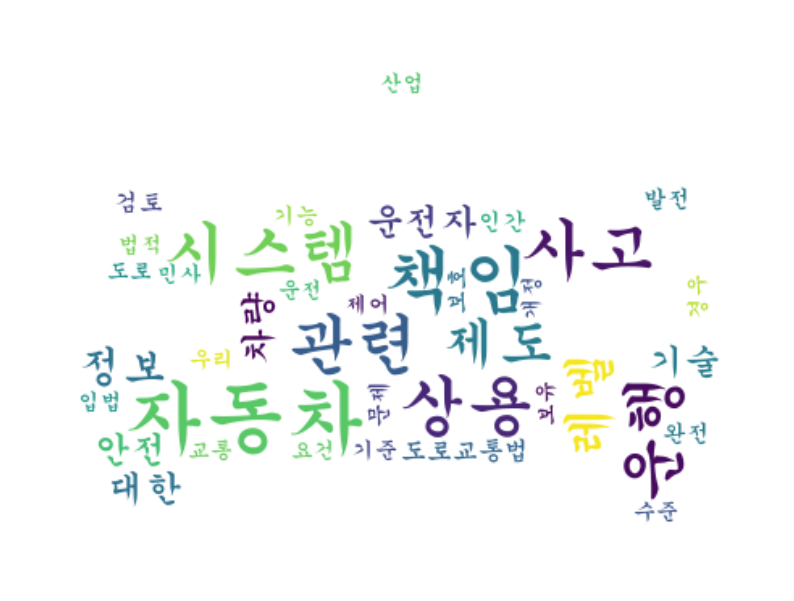

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

background = np.array(Image.open('car.jpg'))
wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\H2GSRB.TTF',
               mask = background,
               relative_scaling = 0.2,
               background_color = "white",
               min_font_size = 1,
               max_font_size = 50,
               max_words = 100
).generate_from_frequencies(dict(data7))

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Update CSV

In [ ]:
#Step 1. 필요한 모듈을 로딩합니다
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import time  # 로딩시간을 위해 기다려준다.

#Step 3. 크롬 드라이버 설정 및 웹 페이지 열기
s = Service("c:/py_temp/chromedriver.exe")
driver = webdriver.Chrome(service=s)
driver.get("https://www.riss.kr/index.do")
# driver.maximize_window()
time.sleep(2)

keyword = '자율주행'
search_bar = driver.find_element(By.ID, 'query')
search_bar.click()
search_bar.send_keys(keyword)
search_bar.send_keys(Keys.ENTER)
# search_bar.submit()

driver.find_element(By.LINK_TEXT, '국내학술논문').click()


In [ ]:
# 검색결과 건수 확인
html_1 = driver.page_source #현재 페이지의 전체 소스코드를 다 가져오기
soup_1 = BeautifulSoup(html_1, 'html.parser')
rslt_cnt = soup_1.find('div', 'searchBox').find('span', 'num').get_text()
print(f"검색결과는 총 {rslt_cnt}건 입니다.")

검색결과는 총 6,941건 입니다.


검색결과는 총 6941건 입니다.


In [ ]:
rslt_cnt = int(rslt_cnt.replace(',',''))
rslt_cnt

# 희망 검색건수 입력
user_cnt = int(input("몇 건을 검색하시겠습니까?"))

if rslt_cnt < user_cnt:
    print(f"검색가능한 결과보다 요청하신 건수가 더 많으므로 {rslt_cnt}건을 수집하겠습니다 ")
    user_cnt = rslt_cnt
else :
    print(f"{user_cnt}건에 대한 수집을 진행합니다:")

검색가능한 결과보다 요청하신 건수가 더 많으므로 6941건을 수집하겠습니다 


695

In [ ]:
driver.find_element(By.XPATH, '//*[@id="divContent"]/div/div[2]/div/div[3]/div[1]/div[2]/div[3]/div[1]').click()
driver.find_element(By.XPATH, '//*[@id="divContent"]/div/div[2]/div/div[3]/div[1]/div[2]/div[3]/div[2]/div/ul/li[5]/a').click()
driver.find_element(By.CLASS_NAME, 'listSearch').click()

In [ ]:
#페이지 수 계산
import math
page_no = math.ceil(user_cnt/100)
page_no

70

In [ ]:
page_no = 11
title_list = []
url_list= []


for i in range(2, page_no):

    title_url_collector()
    driver.find_element(By.LINK_TEXT, str(i)).click()
    time.sleep(1)

In [ ]:
dataframe = pd.DataFrame()
dataframe['title'] = title_list
dataframe['abstract'] = 'na'
dataframe['collected'] = False
dataframe


dataframe[dataframe['collected'] == True]

,title,abstract,collected


In [ ]:

df = pd.DataFrame()

df['title'] = title_list
df['abstract'] = 'na'
df['url'] = url_list
df['collected'] = False
df

,title,abstract,url,collected
0,머신비전과 지이로 센서를 이용한 무인자율 주행 시스템 개발 1 : 직진 주행 알고리...,na,https://www.riss.kr//search/detail/DetailView....,False
1,DGPS와 퍼지제어를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제주행 Real ...,na,https://www.riss.kr//search/detail/DetailView....,False
2,기계시각과 퍼지논리를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제 주행 Real...,na,https://www.riss.kr//search/detail/DetailView....,False
3,제4차 산업혁명 시대의 자율주행자동차 상용화를 위한 안정적 법적 기반을 위한 법정책...,na,https://www.riss.kr//search/detail/DetailView....,False
4,자율주행차와 통상규범,na,https://www.riss.kr//search/detail/DetailView....,False
...,...,...,...,...
85,자율주행자동차 상용화 대비와 공도주행을 위한 입법동향에 관한 고찰 - 일본도로교통법...,na,https://www.riss.kr//search/detail/DetailView....,False
86,자율주행 시뮬레이터를 활용한 도로환경 적합도 평가 연구,na,https://www.riss.kr//search/detail/DetailView....,False
87,자율주행차 현황분석과 한국의 경쟁력 확보 전략,na,https://www.riss.kr//search/detail/DetailView....,False
88,가상환경에 기반한 자율주행 운전 능력 평가시스템 개발 방향,na,https://www.riss.kr//search/detail/DetailView....,False


In [ ]:

df['title'] = title_list
df['abstract'] = 'na'
df['url'] = url_list
df['collected'] = False
df

In [ ]:
df['collected'] == False

0     False
1     False
2     False
3     False
4     False
      ...  
85    False
86    False
87    False
88    False
89    False
Name: collected, Length: 90, dtype: bool

In [ ]:
row_to_update = df[df['collected']==False]
row_to_update

,title,abstract,url,collected
0,머신비전과 지이로 센서를 이용한 무인자율 주행 시스템 개발 1 : 직진 주행 알고리...,na,https://www.riss.kr//search/detail/DetailView....,False
1,DGPS와 퍼지제어를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제주행 Real ...,na,https://www.riss.kr//search/detail/DetailView....,False
2,기계시각과 퍼지논리를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제 주행 Real...,na,https://www.riss.kr//search/detail/DetailView....,False
3,제4차 산업혁명 시대의 자율주행자동차 상용화를 위한 안정적 법적 기반을 위한 법정책...,na,https://www.riss.kr//search/detail/DetailView....,False
4,자율주행차와 통상규범,na,https://www.riss.kr//search/detail/DetailView....,False
...,...,...,...,...
85,자율주행자동차 상용화 대비와 공도주행을 위한 입법동향에 관한 고찰 - 일본도로교통법...,na,https://www.riss.kr//search/detail/DetailView....,False
86,자율주행 시뮬레이터를 활용한 도로환경 적합도 평가 연구,na,https://www.riss.kr//search/detail/DetailView....,False
87,자율주행차 현황분석과 한국의 경쟁력 확보 전략,na,https://www.riss.kr//search/detail/DetailView....,False
88,가상환경에 기반한 자율주행 운전 능력 평가시스템 개발 방향,na,https://www.riss.kr//search/detail/DetailView....,False


In [ ]:

abstract_list = []
for index, row in row_to_update.iterrows():
    url = row['url']
    driver.get(url)
    time.sleep(1)

    html_1 = driver.page_source #현재 페이지의 전체 소스코드를 다 가져오기
    soup_1 = BeautifulSoup(html_1, 'html.parser')
    try:
        abstract_kor = soup_1.find('div', 'content additionalInfo').get_text()
        abstract_list.append(abstract_kor)
    except:
        abstract_list.append('NA')
        pass

df.loc[df['collected']==False, 'abstract'] = abstract_list

df.loc[df['collected']==False, 'collected'] = True

df

,title,abstract,url,collected
0,머신비전과 지이로 센서를 이용한 무인자율 주행 시스템 개발 1 : 직진 주행 알고리...,\n\n목차 (Table of Contents)\n\n\nAbstract 1. 서...,https://www.riss.kr//search/detail/DetailView....,True
1,DGPS와 퍼지제어를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제주행 Real ...,NA,https://www.riss.kr//search/detail/DetailView....,True
2,기계시각과 퍼지논리를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제 주행 Real...,NA,https://www.riss.kr//search/detail/DetailView....,True
3,제4차 산업혁명 시대의 자율주행자동차 상용화를 위한 안정적 법적 기반을 위한 법정책...,NA,https://www.riss.kr//search/detail/DetailView....,True
4,자율주행차와 통상규범,\n\n목차 (Table of Contents)\n\n\nⅠ. 서론\n\nⅡ. 자율...,https://www.riss.kr//search/detail/DetailView....,True
...,...,...,...,...
85,자율주행자동차 상용화 대비와 공도주행을 위한 입법동향에 관한 고찰 - 일본도로교통법...,NA,https://www.riss.kr//search/detail/DetailView....,True
86,자율주행 시뮬레이터를 활용한 도로환경 적합도 평가 연구,\n\n\n\n\n\n국문 초록 (Abstract)\n\n\t\t\t\n자율주행차의...,https://www.riss.kr//search/detail/DetailView....,True
87,자율주행차 현황분석과 한국의 경쟁력 확보 전략,NA,https://www.riss.kr//search/detail/DetailView....,True
88,가상환경에 기반한 자율주행 운전 능력 평가시스템 개발 방향,\n\n\n\n\n\n다국어 초록 (Multilingual Abstract)\n\n...,https://www.riss.kr//search/detail/DetailView....,True


![image.png](attachment:image.png)

In [ ]:
driver.get(url_list[1])

In [ ]:
# 새로운 데이터로 Data Frame 생성
# 딕셔너리 선언
new_row = {
    'title' : "제목1",
    'abstract' : "NA",
    'url' : "sample.com",
    'collected' : False
}

df_new_row = pd.DataFrame([new_row])
# df_new_row = pd.DataFrame()

# df_new_row['title'] = title_list
# df_new_row['abstract'] = 'na'
# df_new_row['url'] = url_list
# df_new_row['collected'] = False
df_new_row

# 주의 : 컬럼 순서, header(컬럼 이름), 데이터 타입 일치

,title,abstract,url,collected
0,제목1,NA,sample.com,False


In [ ]:

df = pd.concat([df, df_new_row], ignore_index=True)
df

,title,abstract,url,collected
0,머신비전과 지이로 센서를 이용한 무인자율 주행 시스템 개발 1 : 직진 주행 알고리...,\n\n목차 (Table of Contents)\n\n\nAbstract 1. 서...,https://www.riss.kr//search/detail/DetailView....,True
1,DGPS와 퍼지제어를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제주행 Real ...,NA,https://www.riss.kr//search/detail/DetailView....,True
2,기계시각과 퍼지논리를 이용한 스피드스프레이어의 자율주행(Ⅱ) : 실제 주행 Real...,NA,https://www.riss.kr//search/detail/DetailView....,True
3,제4차 산업혁명 시대의 자율주행자동차 상용화를 위한 안정적 법적 기반을 위한 법정책...,NA,https://www.riss.kr//search/detail/DetailView....,True
4,자율주행차와 통상규범,\n\n목차 (Table of Contents)\n\n\nⅠ. 서론\n\nⅡ. 자율...,https://www.riss.kr//search/detail/DetailView....,True
...,...,...,...,...
86,자율주행 시뮬레이터를 활용한 도로환경 적합도 평가 연구,\n\n\n\n\n\n국문 초록 (Abstract)\n\n\t\t\t\n자율주행차의...,https://www.riss.kr//search/detail/DetailView....,True
87,자율주행차 현황분석과 한국의 경쟁력 확보 전략,NA,https://www.riss.kr//search/detail/DetailView....,True
88,가상환경에 기반한 자율주행 운전 능력 평가시스템 개발 방향,\n\n\n\n\n\n다국어 초록 (Multilingual Abstract)\n\n...,https://www.riss.kr//search/detail/DetailView....,True
89,자율주행차의 발전단계로 본 운전자와 인공지능의 주의의무의 변화와 규범적 판단능력의 ...,NA,https://www.riss.kr//search/detail/DetailView....,True


In [ ]:
row_to_update = df[df['collected']==False]
row_to_update

,title,abstract,url,collected
90,제목1,NA,sample.com,False


In [ ]:
# pd.merge() - Join

df_1 = {'학번': ['1001','1002','1003'] ,
        '이름': ['홍길동','일지매','전우치'] ,
        '키' : [180 , 175 , 168] }
stu_1 = pd.DataFrame(df_1)
stu_1

,학번,이름,키
0,1001,홍길동,180
1,1002,일지매,175
2,1003,전우치,168


In [ ]:
df_2 = {'학번': ['1001','1002','1004'] ,
        '이름': ['홍길동','일지매','강감찬'] ,
        '몸무게' : [80 , 75 , 68] }
stu_2 = pd.DataFrame(df_2)
stu_2

,학번,이름,몸무게
0,1001,홍길동,80
1,1002,일지매,75
2,1004,강감찬,68


In [ ]:
df_concat = pd.concat([stu_1, stu_2], ignore_index=True)
df_concat

,학번,이름,키,몸무게
0,1001,홍길동,180.0,NaN
1,1002,일지매,175.0,NaN
2,1003,전우치,168.0,NaN
3,1001,홍길동,NaN,80.0
4,1002,일지매,NaN,75.0
5,1004,강감찬,NaN,68.0


In [ ]:
pd.merge(stu_1, stu_2)

,학번,이름,키,몸무게
0,1001,홍길동,180,80
1,1002,일지매,175,75


In [ ]:
pd.merge(stu_1, stu_2,
         on="이름"
         )

,학번_x,이름,키,학번_y,몸무게
0,1001,홍길동,180,1001,80
1,1002,일지매,175,1002,75


In [ ]:
pd.merge(stu_1, stu_2,
         how = 'left'
         )

,학번,이름,키,몸무게
0,1001,홍길동,180,80.0
1,1002,일지매,175,75.0
2,1003,전우치,168,NaN


In [ ]:
pd.merge(stu_1, stu_2,
         how = 'right'
         )

,학번,이름,키,몸무게
0,1001,홍길동,180.0,80
1,1002,일지매,175.0,75
2,1004,강감찬,NaN,68


In [ ]:
pd.merge(stu_1, stu_2,
         how = 'outer',
         left_on = '학번',
         right_on = 'stu_no'
         )

,학번,이름_x,키,이름_y,몸무게
0,1001,홍길동,180.0,홍길동,80.0
1,1002,일지매,175.0,일지매,75.0
2,1003,전우치,168.0,NaN,NaN
3,1004,NaN,NaN,강감찬,68.0


In [ ]:
# numpy array(행렬) / dataframe
# row first, col later
stu_1.shape[1] == stu_2.shape[1]
row, col = stu_1.shape
col

3

# 출력 txt 저장

- 모니터 출력 : 컴퓨터의 standard output : 모니터
- 프린터 : standard output : 모니터 -> 종이

- standard output : 모니터 -> txt

In [ ]:
print("Hello python")

Hello python


In [ ]:
import sys

#설정 백업
orig_stdout = sys.stdout

# txt
file = open('stdout_test.txt', 'a', encoding='utf-8')
# 출력 전환
sys.stdout = file

# txt로 출력할 내용(저장할 내용)
for i in range(10):
    print("Hello python")
    # 크롤링 경과

file.close()

# 출력 원복

sys.stdout = orig_stdout

실습
- 키워드 입력
- 네이버 : 블로그 검색결과 print 로 정리해서 .txt로 출력하시오(저장하시오)
- 구글 : 입력 키워드 검색


# Selenium으로 요소 설정하기

find_element(By.[ ] )
- ID = "id"
- NAME = "name"
- LINK_TEXT = "link text"
- CLASS_NAME = "class name"

- XPATH = "xpath"
'//*[@id="REsRA"]'
- CSS_SELECTOR = "css selector"

- PARTIAL_LINK_TEXT = "partial link text"
- TAG_NAME = "tag name"


In [ ]:
# #Step 1. 필요한 모듈을 로딩합니다
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import time  # 로딩시간을 위해 기다려준다.

In [ ]:
s = Service("c:/py_temp/chromedriver.exe")
driver = webdriver.Chrome(service=s)
driver.get("https://section.blog.naver.com/BlogHome.naver?directoryNo=0&currentPage=1&groupId=0")


In [ ]:
xpath = '//*[@id="header"]/div[1]/div/div[2]/form/fieldset/div/input'
# src_bar = driver.find_element(By.CLASS_NAME, 'search')
src_bar = driver.find_element(By.XPATH, xpath)
src_bar.click()
src_bar.send_keys("강아지")
src_bar.send_keys("\n")

In [ ]:
def scroll_down(scroll_count):
    for i in range(scroll_count):
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
        time.sleep(2)

In [ ]:
scroll_down(1)

In [ ]:
from bs4 import BeautifulSoup

html_1 = driver.page_source
soup_1 = BeautifulSoup(html_1, 'html.parser')

In [ ]:
contents = soup_1.find('div', 'area_list_search').find_all('img')
contentshttps://blogpfthumb-phinf.pstatic.net/MjAyNDA1MDVfODYg/MDAxNzE0OTE2ODIyNjYx.KJjgXc1r2eFhoDAZNWEqBDwItct68OMO_1Bj7-lpTqkg.CKF2dB-yDfvBp6bKOgKwQNQZNFZaWi19Y2Ur1q9AiJIg.PNG/profileImage.png?type=s1

[<img alt="블로거 썸네일" bg-image="https://blogpfthumb-phinf.pstatic.net/MjAyNDA1MDVfODYg/MDAxNzE0OTE2ODIyNjYx.KJjgXc1r2eFhoDAZNWEqBDwItct68OMO_1Bj7-lpTqkg.CKF2dB-yDfvBp6bKOgKwQNQZNFZaWi19Y2Ur1q9AiJIg.PNG/profileImage.png?type=s1" class="img_author" height="25" src="https://blogpfthumb-phinf.pstatic.net/MjAyNDA1MDVfODYg/MDAxNzE0OTE2ODIyNjYx.KJjgXc1r2eFhoDAZNWEqBDwItct68OMO_1Bj7-lpTqkg.CKF2dB-yDfvBp6bKOgKwQNQZNFZaWi19Y2Ur1q9AiJIg.PNG/profileImage.png?type=s1" width="25"/>,
 <img alt="포스트 썸네일" bg-image="https://blogthumb.pstatic.net/MjAyNDA0MjZfMTQ3/MDAxNzE0MTI2MTY5MDMx.Z2zHqU2SWFEDFWXp5sC0r16bWMrAH1XM1oAEpzWPqXcg.3ADE7oHeQCeGt8jWTlx5isGjsvitMEwheDJYz6w57QEg.JPEG/output_553226694.jpg?type=s2" class="img_post" height="167" ng-class="{background_color:thumbnail['noThisDayThumbnail']}" ng-hide="thumbnail['noThisDayThumbnail']" src="https://blogthumb.pstatic.net/MjAyNDA0MjZfMTQ3/MDAxNzE0MTI2MTY5MDMx.Z2zHqU2SWFEDFWXp5sC0r16bWMrAH1XM1oAEpzWPqXcg.3ADE7oHeQCeGt8jWTlx5isGjsvitMEwheDJYz6w57QEg.JPEG/out

In [ ]:
img_url_list = []
for i in contents:
    img_url = i['src']
    img_url_list.append(img_url)
img_url_list

['https://blogpfthumb-phinf.pstatic.net/MjAyNDA1MDVfODYg/MDAxNzE0OTE2ODIyNjYx.KJjgXc1r2eFhoDAZNWEqBDwItct68OMO_1Bj7-lpTqkg.CKF2dB-yDfvBp6bKOgKwQNQZNFZaWi19Y2Ur1q9AiJIg.PNG/profileImage.png?type=s1',
 'https://blogthumb.pstatic.net/MjAyNDA0MjZfMTQ3/MDAxNzE0MTI2MTY5MDMx.Z2zHqU2SWFEDFWXp5sC0r16bWMrAH1XM1oAEpzWPqXcg.3ADE7oHeQCeGt8jWTlx5isGjsvitMEwheDJYz6w57QEg.JPEG/output_553226694.jpg?type=s2',
 'https://blogthumb.pstatic.net/MjAyNDA0MjZfMjkz/MDAxNzE0MTI2MTcxOTM2.lxnTKWaGvebYlw79tE9-W1To4G_RRYAEvya7NlXAjv4g.q4YIjtt_LqxKdgtRAMMkAlVEBnzGLtl4Vxb427E9jZsg.JPEG/output_1458047639.jpg?type=s2',
 'https://blogthumb.pstatic.net/MjAyNDA0MjZfMTY3/MDAxNzE0MTI2MTczMTA2.jkW1Hc9t8VjlSiJwBJ3gg58RzDtCIDbPYoCpfZXpQjkg.HZ_i_ojgwPNyFU2_urcJdIFAtPqPAihdaFs1TuwvpbMg.JPEG/output_1895575866.jpg?type=s2',
 'https://blogthumb.pstatic.net/MjAyNDA0MjZfNTkg/MDAxNzE0MTI2MTczMDU1.LrEp4iD0nTY0MdH4_90vAOihgH70_xXaJ7XG0ckfGmgg.lZ8uvH_WnnDsHajeqNxUQ7ejrFHifEcKb_mMhrIMd5wg.JPEG/IMG_0495.JPG?type=s2',
 'https://blogpfthumb-p

In [ ]:
!pip install requests # 서버에 직접적으로 접속해서 데이터 수령

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
img_url

'https://blogthumb.pstatic.net/MjAyNDA0MjlfMjk5/MDAxNzE0MzgwODQyNDA1.LLYyK_tLiPoMpWioPfODL9OmuyeXf25q2IYykpd-aXcg.TEJWotbSC5WKARn5OyhkrqKwT_sEZIr2rc0_WbKKQnIg.JPEG/20240421_171412.jpg?type=s2'

In [ ]:
import requests

In [ ]:
import os
img_dir = 'H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\\images'
os.makedirs(img_dir)


FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'H:\\내 드라이브\\강의자료\\아주대_파이썬1급\\공유폴더\\images'

In [ ]:
img_dir

'H:\\내 드라이브\\강의자료\\아주대_파이썬1급\\공유폴더\\images'

In [ ]:
img_url_list

['https://blogpfthumb-phinf.pstatic.net/MjAyNDA1MDVfODYg/MDAxNzE0OTE2ODIyNjYx.KJjgXc1r2eFhoDAZNWEqBDwItct68OMO_1Bj7-lpTqkg.CKF2dB-yDfvBp6bKOgKwQNQZNFZaWi19Y2Ur1q9AiJIg.PNG/profileImage.png?type=s1',
 'https://blogthumb.pstatic.net/MjAyNDA0MjZfMTQ3/MDAxNzE0MTI2MTY5MDMx.Z2zHqU2SWFEDFWXp5sC0r16bWMrAH1XM1oAEpzWPqXcg.3ADE7oHeQCeGt8jWTlx5isGjsvitMEwheDJYz6w57QEg.JPEG/output_553226694.jpg?type=s2',
 'https://blogthumb.pstatic.net/MjAyNDA0MjZfMjkz/MDAxNzE0MTI2MTcxOTM2.lxnTKWaGvebYlw79tE9-W1To4G_RRYAEvya7NlXAjv4g.q4YIjtt_LqxKdgtRAMMkAlVEBnzGLtl4Vxb427E9jZsg.JPEG/output_1458047639.jpg?type=s2',
 'https://blogthumb.pstatic.net/MjAyNDA0MjZfMTY3/MDAxNzE0MTI2MTczMTA2.jkW1Hc9t8VjlSiJwBJ3gg58RzDtCIDbPYoCpfZXpQjkg.HZ_i_ojgwPNyFU2_urcJdIFAtPqPAihdaFs1TuwvpbMg.JPEG/output_1895575866.jpg?type=s2',
 'https://blogthumb.pstatic.net/MjAyNDA0MjZfNTkg/MDAxNzE0MTI2MTczMDU1.LrEp4iD0nTY0MdH4_90vAOihgH70_xXaJ7XG0ckfGmgg.lZ8uvH_WnnDsHajeqNxUQ7ejrFHifEcKb_mMhrIMd5wg.JPEG/IMG_0495.JPG?type=s2',
 'https://blogpfthumb-p

In [ ]:


# response = requests.get(img_url)

# file = open("image_1.jpg", 'wb')

# with open("image_1.jpg", 'wb') as file:
#     file.write(response.content)

for i in range(len(img_url_list)):

    response = requests.get(img_url_list[i])
    img_name = f'image_{i}.jpg'
    print(img_name)

    img_name_dir = os.path.join(img_dir,img_name)


    print(img_name_dir)
    with open(img_name_dir, 'wb') as file:
        file.write(response.content)
    # img_name = img_dir + f'\\image_{i}.jpg'




image_0.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_0.jpg
image_1.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_1.jpg
image_2.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_2.jpg
image_3.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_3.jpg
image_4.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_4.jpg
image_5.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_5.jpg
image_6.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_6.jpg
image_7.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_7.jpg
image_8.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_8.jpg
image_9.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_9.jpg
image_10.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_10.jpg
image_11.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_11.jpg
image_12.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_12.jpg
image_13.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_13.jpg
image_14.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_14.jpg
image_15.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_15.jpg
image_16.jpg

H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg
H:\내 드라이브\강의자료\아주대_파이썬1급\공유폴더\images\image_34.jpg


'H:\\내 드라이브\\강의자료\\아주대_파이썬1급\\공유폴더\\images\\image_34.jpg'